# Dataset summary of imputation performance and robustness

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Matplotlib command for Jupyter notebooks only
%matplotlib inline

In [2]:
# importing custom functions for imputation and evaluation
import sys

sys.path.append("/home/mklein/sc_imputation_denoising")
from sc_imputation_denoising.imputation.constants import const

IE version 1.2


In [4]:
path = '/g/alexandr/Marius/imputation_evaluation/'
# list all directories in the path
dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
dirs

['Mx_Seahorse_cond4_mnar_c0.1_i0.2_fdr1_repl2',
 'Mx_Seahorse_cond4_mnar_c0.1_i0.2_fdr1_repl1',
 'Lx_Glioblastoma_cond6_mnar_c0.05_i0.05_fdr1_repl1',
 'Lx_Pancreatic_Cancer_cond4_mnar_c0.2_i0.05_fdr1_repl1',
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1',
 'Mx_Seahorse_cond4_mcar_c0.1_i0.2_fdr1_repl1',
 'Lx_Glioblastoma_cond6_mcar_c0.05_i0.05_fdr1_repl1',
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl1',
 'Lx_Pancreatic_Cancer_cond4_mcar_c0.2_i0.05_fdr1_repl1',
 'Mx_Seahorse_c0.1_i0.2_fdr1_summary',
 'Mx_Seahorse_cond4_mcar_c0.2_i0.2_fdr1_repl8',
 'Mx_Seahorse_cond4_mcar_c0.1_i0.2_fdr1_repl3',
 'Mx_Seahorse_cond4_mnar_c0.1_i0.2_fdr1_repl5',
 'Mx_Seahorse_cond4_mnar_c0.1_i0.2_fdr1_repl4',
 'Mx_Seahorse_cond4_mcar_c0.1_i0.2_fdr1_repl4',
 'Mx_Seahorse_cond4_mnar_c0.1_i0.2_fdr1_repl3',
 'Mx_Seahorse_cond4_mcar_c0.1_i0.2_fdr1_repl5',
 'Mx_Seahorse_cond4_mcar_c0.1_i0.2_fdr1_repl2',
 'Lx_Pancreatic_Cancer_cond4_mnar_c0.2_i0.05_fdr1_repl5',
 'Lx_Pancreatic_Cancer_cond4_mnar_c0.2_i0.05_fdr1_repl2',
 

In [338]:
dataset = 'Mx_Seahorse'
c = 0.1
i = 0.2

dataset = 'Lx_Pancreatic_Cancer'
c = 0.2
i = 0.05

dataset = 'Lx_Glioblastoma'
c = 0.05
i = 0.05

dataset = 'Lx_HepaRG'
c = 0.2
i = 0.2

fdr = 1

summary_folder = dataset + '_c' + str(c) + '_i' + str(i) + '_fdr' + str(fdr) + '_summary'
prefix = '^' + dataset + '_.*' +  '_c' + str(c) + '_i' + str(i) + '_fdr' + str(fdr)

In [339]:
sum_path = os.path.join(path, summary_folder)
if not os.path.exists(sum_path):
    os.makedirs(sum_path)

folders = [d for d in dirs if re.compile(prefix).match(d)]

print(len(folders))
folders

11


['Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1',
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl1',
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl2',
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl4',
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl3',
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl2',
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl3',
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl5',
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl5',
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl4',
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6']

In [340]:
replicate_list = []
for repl_folder in folders:
    
    try:
        load_df = pd.read_csv(f'{path}/{repl_folder}/evaluation.csv')
        load_df['replicate'] = os.path.basename(repl_folder)
        replicate_list.append(load_df)
    except:
        pass

concat_df = pd.concat(replicate_list, ignore_index=True)
del concat_df['Unnamed: 0']
print(len(concat_df.replicate.unique()))
print(concat_df.replicate.unique())
concat_df = concat_df[~concat_df['imputation'].isin(['dca_zinb-conddisp', 'dca_nb-conddisp', 'fancy_softbi'])]
concat_df


11
['Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1'
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl1'
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl2'
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl4'
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl3'
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl2'
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl3'
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl5'
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl5'
 'Lx_HepaRG_cond4_mcar_c0.2_i0.2_fdr1_repl4'
 'Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6']


,corr_ions,corr_ions_diff,corr_cells,variance_mse,mse,ari,silhouette,davies_bouldin,calinski_harabasz,imputation,dr,dropout_ratio,simulation,replicate
0,0.029125,0.000000,0.606760,0.000000,0.000000,0.379159,0.263664,3.872908,1564.344002,ctrl,0.39_baseline,0.39,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1
1,0.054592,0.025466,0.737700,0.517864,0.281786,0.398901,0.234277,2.662323,3319.167976,MAGIC_t1,0.39_baseline,0.39,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1
2,0.067871,0.038746,0.778343,0.839917,0.477352,0.405232,0.207696,2.277239,4534.145308,MAGIC_t2,0.39_baseline,0.39,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1
3,0.073459,0.044333,0.796537,1.010386,0.598172,0.409585,0.202318,2.097028,5373.860535,MAGIC_t3,0.39_baseline,0.39,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1
4,0.074913,0.045787,0.814286,1.197166,0.724662,0.413738,0.190755,1.935120,6500.952684,MAGIC_t5,0.39_baseline,0.39,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,0.006833,0.022292,0.942945,2.664262,4.342721,0.101158,-0.006824,6.451335,612.847378,ctrl_mean,0.86,0.86,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6
1308,0.056804,0.027678,0.959844,2.528728,1.926656,0.117462,0.049566,3.669659,1886.341996,fancy_soft,0.86,0.86,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6
1309,0.024036,0.005090,0.820294,1.171083,1.178417,0.207530,0.138247,3.286668,2259.370769,fancy_itersvd,0.86,0.86,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6
1311,0.039098,0.009973,0.924255,2.165596,1.876252,0.126430,0.048948,3.744124,1838.265937,dca_zinb,0.86,0.86,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6


In [341]:
concat_df = concat_df[~concat_df['imputation'].isin(const.EXCLUDE_IMPUTATION)].copy()
concat_df = concat_df[concat_df['simulation'] == "mnar"].copy()
concat_df.imputation.unique()

array(['ctrl', 'MAGIC_t1', 'MAGIC_t3', 'ALRA', 'knn_3', 'knn_5',
       'ctrl_mean', 'fancy_itersvd', 'dca_zinb', 'dca_nb', 'fancy_multi'],
      dtype=object)

In [342]:
const.IMPUTATION_GROUPS = {
        'ctrl': 'ctrl',
        'ctrl_mean': 'fixed value imputation',
        'fancy_multi': 'MICE imputation',
        'fancy_itersvd': 'SVD imputation',
        'knn_3': 'kNN imputation',
        'knn_5': 'kNN imputation',
        'MAGIC_t1': 'kNN denoising',
        'MAGIC_t3': 'kNN denoising',
        'ALRA': 'SVD denoising',
        'dca_nb': 'ML denoising',
        'dca_zinb': 'ML denoising',
    }

const.IMP_ORDER = ['ctrl', 'fixed value imputation', 'kNN imputation', 'SVD imputation', 'MICE imputation', 'ML denoising', 'kNN denoising', 'SVD denoising']
order_dict = dict(zip(const.IMP_ORDER, range(len(const.IMP_ORDER))))

In [343]:
concat_df['group'] = concat_df['imputation'].map(const.IMPUTATION_GROUPS)
concat_df['ctrl'] = concat_df['group'].map(order_dict)

In [344]:
# eval_df = df.set_index(['dropout_ratio', 'imputation']).groupby('dr', group_keys=True).apply(scipy.stats.zscore).reset_index()
# concat_df['group'] = list(concat_df['imputation'].apply(lambda x: re.sub('_[^_]+$', '', x)))
df = concat_df.set_index(['dropout_ratio', 'dr', 'imputation', 'group', 'simulation', 'replicate'])

df['corr_ions_diff'] = -df['corr_ions_diff']
df['mse'] = -df['mse']
df['variance_mse'] = -df['variance_mse']
df['davies_bouldin'] = -df['davies_bouldin']



In [345]:
df = df[~((df.index.get_level_values('replicate') == 'Lx_Glioblastoma_cond6_mnar_c0.05_i0.05_fdr1_repl5') & (df.index.get_level_values('imputation') == 'fancy_multi'))]
df[df.index.get_level_values('imputation') == 'fancy_multi']

,,,,,,corr_ions,corr_ions_diff,corr_cells,variance_mse,mse,ari,silhouette,davies_bouldin,calinski_harabasz,ctrl
dropout_ratio,dr,imputation,group,simulation,replicate,,,,,,,,,,
0.39,0.39_baseline,fancy_multi,MICE imputation,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1,0.076686,-0.047561,0.736119,-1.741707,-2.104368,0.214446,0.152916,-3.847357,1789.625414,4
0.46,0.46,fancy_multi,MICE imputation,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1,0.079961,-0.050836,0.763449,-1.817324,-2.099287,0.218094,0.184695,-3.517891,2163.455164,4
0.54,0.54,fancy_multi,MICE imputation,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1,0.065224,-0.036099,0.783868,-1.900622,-2.151685,0.229002,0.200490,-3.240651,2618.729664,4
0.63,0.63,fancy_multi,MICE imputation,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1,0.037693,-0.008567,0.795510,-2.014216,-2.355295,0.216384,0.204537,-3.191112,2676.420849,4
0.73,0.73,fancy_multi,MICE imputation,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1,0.019533,-0.009592,0.812431,-2.198929,-2.834393,0.205360,0.204204,-3.208279,2572.125461,4
0.86,0.86,fancy_multi,MICE imputation,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1,0.033551,-0.004426,0.815267,-2.435097,-4.096972,0.125935,0.129197,-3.668319,1639.189204,4
0.39,0.39_baseline,fancy_multi,MICE imputation,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl4,0.076686,-0.047561,0.736119,-1.741707,-2.104368,0.214446,0.149099,-3.847357,1789.625414,4
0.46,0.46,fancy_multi,MICE imputation,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl4,0.079461,-0.050336,0.767220,-1.815892,-2.108982,0.223089,0.194984,-3.489983,2193.388282,4
0.54,0.54,fancy_multi,MICE imputation,mnar,Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl4,0.065934,-0.036808,0.783877,-1.901842,-2.156234,0.228157,0.203627,-3.247277,2587.259706,4


In [346]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# eval_df = df.apply(scipy.stats.zscore)
eval_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
eval_df


corr_ions  \
dropout_ratio dr            imputation    group                  simulation replicate                                              
0.39          0.39_baseline ctrl          ctrl                   mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1   0.286218   
                            MAGIC_t1      kNN denoising          mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1   0.574493   
                            MAGIC_t3      kNN denoising          mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1   0.788061   
                            ALRA          SVD denoising          mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1   0.822811   
                            knn_3         kNN imputation         mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1   0.964891   
...                                                                                                                          ...   
0.86          0.86          knn_5         kNN imputation         mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6   0.255533   
                            ctrl_mean     fixed value imputation mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6   0.033874   
                            fancy_itersvd SVD imputation         mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6   0.228606   
                            dca_zinb      ML denoising           mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6   0.399110   
                            dca_nb        ML denoising           mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6   0.584035   

                                                                                                                       corr_ions_diff  \
dropout_ratio dr            imputation    group                  simulation replicate                                                   
0.39          0.39_baseline ctrl          ctrl                   mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1        1.000000   
                            MAGIC_t1      kNN denoising          mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1        0.596131   
                            MAGIC_t3      kNN denoising          mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1        0.296924   
                            ALRA          SVD denoising          mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1        0.248239   
                            knn_3         kNN imputation         mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1        0.049188   
...                                                                                                                               ...   
0.86          0.86          knn_5         kNN imputation         mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6        0.957011   
                            ctrl_mean     fixed value imputation mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6        0.646470   
                            fancy_itersvd SVD imputation         mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6        0.919286   
                            dca_zinb      ML denoising           mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6        0.841840   
                            dca_nb        ML denoising           mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl6        0.582761   

                                                                                                                       corr_cells  \
dropout_ratio dr            imputation    group                  simulation replicate                                               
0.39          0.39_baseline ctrl          ctrl                   mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1    0.451978   
                            MAGIC_t1      kNN denoising          mnar       Lx_HepaRG_cond4_mnar_c0.2_i0.2_fdr1_repl1    0.665299   
                            MAGIC_t3      kNN denoising          mnar       Lx_HepaRG_co

In [347]:
# eval_df['cluster_separation'] = (eval_df['ari'] + eval_df['silhouette'] + eval_df['oob_score']) / 3
eval_df['cluster_separation'] = (eval_df['ari'] + eval_df['silhouette'] + eval_df['davies_bouldin'] + eval_df['calinski_harabasz']) / 4
eval_df['information_recovery'] = (eval_df['corr_cells'] + eval_df['corr_ions_diff'] + eval_df['variance_mse'] + eval_df['mse']) / 4
# eval_df['ctrl'] = [ 'ctrl' if c == 'ctrl' else 'imputation' for c in eval_df.index.get_level_values('group')]

{'ctrl': 1, 'fixed value imputation': 1, 'kNN imputation': 2, 'SVD imputation': 1, 'MICE imputation': 1, 'ML denoising': 2, 'kNN denoising': 2, 'SVD denoising': 1}


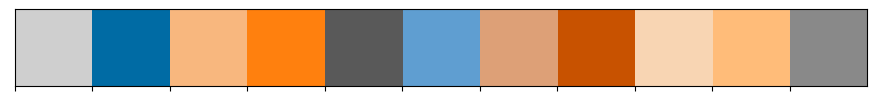

In [348]:
imp_order = eval_df.reset_index().sort_values(['ctrl', 'imputation'])[['group', 'imputation']].drop_duplicates()
colors = const.IMP_ORDER # imp_order['group'].unique()
n_colors = [len(imp_order[imp_order['group'] == c]) for c in colors]

def generate_color_palette(color_list):
    # Generate a base color palette
    base_palette = sns.color_palette(
        ['#CFCFCF', '#006BA4', '#FF800E', '#595959', '#5F9ED1', '#C85200', '#FFBC79', '#898989', '#A2C8EC'], 
        n_colors=len(color_list))
    
    # Generate shades for each base color
    color_palette = []
    for i, color in enumerate(base_palette):
        shades = sns.light_palette(color, n_colors=color_list[i] + 1)
        color_palette.extend(shades[1:])
    
    return color_palette


# Generate the color palette
cset = generate_color_palette(n_colors)
sns.palplot(cset)
print(dict(zip(colors, n_colors)))

In [349]:
COLOR_template = {'ctrl': (0.4674942375711681, 0.6807987352493481, 0.7969635100116484),
 'ctrl_mean': (0.0, 0.4196078431372549, 0.6431372549019608),
 'fancy_itersvd': (0.976249987924192, 0.7208024833334978, 0.4948461379450622),
 'fancy_multi': (1.0, 0.5019607843137255, 0.054901960784313725),
 'knn_3': (0.6450787385143271, 0.6450943494613806, 0.6450330062267311),
 'knn_5': (0.34901960784313724, 0.34901960784313724, 0.34901960784313724),
 'ALRA': (0.37254901960784315, 0.6196078431372549, 0.8196078431372549),
 'MAGIC_t1': (0.8679748929727327, 0.6302059588557253, 0.46777925759729744),
 'MAGIC_t3': (0.7843137254901961, 0.3215686274509804, 0.0),
 'dca_nb': (0.7395654837909705, 0.7395810602898067, 0.7395199624957123),
 'dca_zinb': (0.5372549019607843, 0.5372549019607843, 0.5372549019607843)}
imp_order['color'] = imp_order['imputation'].map(COLOR_template)
cset = imp_order['color'].tolist()

In [350]:
eval_sum_df = eval_df.groupby(['dropout_ratio', 'dr', 'imputation', 'group', 'simulation'])[['cluster_separation', 'information_recovery']].agg(['mean', 'std'])
eval_sum_df.columns = eval_sum_df.columns.map(lambda x: '_'.join(map(str, x)))
eval_sum_df = eval_sum_df.reset_index(['group'])
ctrl = eval_sum_df[eval_sum_df.index.get_level_values('imputation')=='ctrl']
for gr in eval_sum_df['group'].unique():
    eval_sum_df = pd.concat([eval_sum_df, ctrl.copy().assign(group=gr)])

eval_sum_df = eval_sum_df.drop_duplicates().set_index('group', append=True)
#eval_sum_df = eval_sum_df[eval_sum_df.index.get_level_values('group')!='ctrl']
min_dr = eval_sum_df.index.get_level_values('dropout_ratio').min()
eval_sum_df['dropout_rate'] = [f"{dr:.0%} baseline" if dr == min_dr else f"{dr:.0%}" for dr in eval_sum_df.index.get_level_values('dropout_ratio')]
eval_sum_df


cluster_separation_mean  \
dropout_ratio dr            imputation simulation group                                             
0.39          0.39_baseline ALRA       mnar       SVD denoising                          0.799772   
                            MAGIC_t1   mnar       kNN denoising                          0.815399   
                            MAGIC_t3   mnar       kNN denoising                          0.900527   
                            ctrl       mnar       ctrl                                   0.691859   
                            ctrl_mean  mnar       fixed value imputation                 0.423355   
...                                                                                           ...   
0.46          0.46          ctrl       mnar       kNN imputation                         0.667390   
0.54          0.54          ctrl       mnar       kNN imputation                         0.608358   
0.63          0.63          ctrl       mnar       kNN imputation                         0.468769   
0.73          0.73          ctrl       mnar       kNN imputation                         0.302231   
0.86          0.86          ctrl       mnar       kNN imputation                         0.060912   

                                                                          cluster_separation_std  \
dropout_ratio dr            imputation simulation group                                            
0.39          0.39_baseline ALRA       mnar       SVD denoising                         0.001681   
                            MAGIC_t1   mnar       kNN denoising                         0.016924   
                            MAGIC_t3   mnar       kNN denoising                         0.005933   
                            ctrl       mnar       ctrl                                  0.000042   
                            ctrl_mean  mnar       fixed value imputation                0.000219   
...                                                                                          ...   
0.46          0.46          ctrl       mnar       kNN imputation                        0.002826   
0.54          0.54          ctrl       mnar       kNN imputation                        0.012387   
0.63          0.63          ctrl       mnar       kNN imputation                        0.003552   
0.73          0.73          ctrl       mnar       kNN imputation                        0.004634   
0.86          0.86          ctrl       mnar       kNN imputation                        0.016871   

                                                                          information_recovery_mean  \
dropout_ratio dr            imputation simulation group                                               
0.39          0.39_baseline ALRA       mnar       SVD denoising                            0.611364   
                            MAGIC_t1   mnar       kNN denoising                            0.772842   
                            MAGIC_t3   mnar       kNN denoising                            0.678790   
                            ctrl       mnar       ctrl                                     0.862995   
                            ctrl_mean  mnar       fixed value imputation                   0.624133   
...                                                                                             ...   
0.46          0.46          ctrl       mnar       kNN imputation                           0.804087   
0.54          0.54          ctrl       mnar       kNN imputation                           0.731239   
0.63          0.63          ctrl       mnar       kNN imputation                           0.613852   
0.73          0.73          ctrl       mnar       kNN imputation                           0.428680   
0.86          0.86          ctrl       mnar       kNN imputation                           0.153028   

                                                                          information_recovery_std  \
dropout_ratio dr 

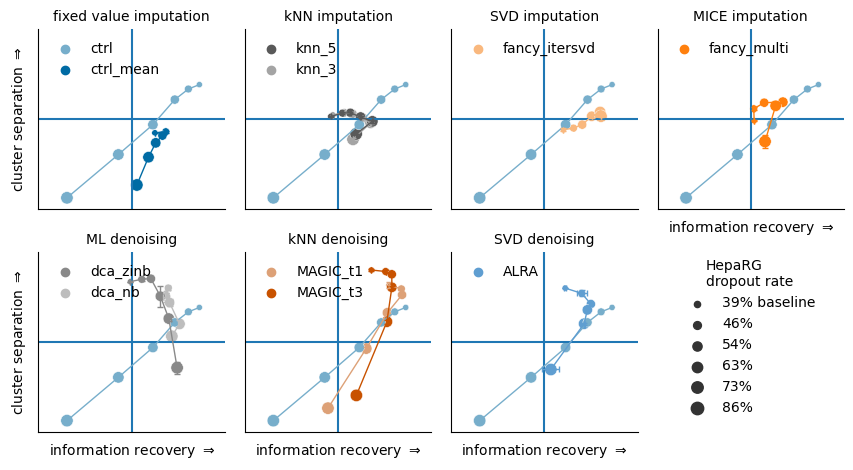

In [351]:
eval_plot = sns.relplot(
    data=eval_sum_df.reset_index(), 
    x='information_recovery_mean', 
    y='cluster_separation_mean', 
    size='dropout_rate',
    sizes=(80, 20),
    col='group', col_wrap=4,
    col_order=colors[1:],
    hue='imputation', 
    hue_order=imp_order['imputation'],
    height=2.4, aspect=0.9, palette=cset,
    facet_kws=dict(legend_out=False),
)

eval_plot.set_xlabels(r'information recovery $\Rightarrow$')
eval_plot.set_ylabels(r'cluster separation $\Rightarrow$')


# max_ext = max(
#     np.max(np.abs(eval_df['information_recovery'])),
#     np.max(np.abs(eval_df['cluster_separation']))
# ) + 0.1
for ax in eval_plot.axes.flat:
    # ax.axhline(0) 
    # ax.axvline(0)
    ax.axhline(0.5) 
    ax.axvline(0.5)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

from adjustText import adjust_text

handles, labels = eval_plot.axes.flat[0].get_legend_handles_labels()
leg_colors = [handle.get_facecolor()[0] for handle in handles]
legend = dict(zip(labels, handles))
leg_new = {}
leg_outer = {}
for lkey in legend.keys():
    # if lkey == "ctrl":
        # continue
    leg_new[lkey] = legend[lkey]

#legend_all = eval_plot.axes.flat[0].legend_.remove()


#sns.move_legend(eval_plot, 'lower right', bbox_to_anchor=(0.5, 0.5), ncol=1, frameon=False)
# eval_plot.axes.flat[0].legend(handles=[legend['ctrl']], labels=['ctrl'], frameon=False, title=None, loc='upper left')

for (row, col, hue), data_table in list(eval_plot.facet_data()):

    present_legend = list(set(leg_new.keys()).intersection(data_table['imputation'].unique()))
    present_legend.sort()
    if col != 0:
        present_legend = list(set(present_legend).difference(['ctrl']))
    leg = eval_plot.axes.flat[col].legend(handles=[leg_new[key] for key in present_legend], labels=present_legend, frameon=False, title=None, loc='upper left')
    
    for sim in eval_sum_df.index.get_level_values('simulation').unique():
        for i, imputation in enumerate(imp_order['imputation']):
            data = data_table[(data_table['imputation'] == imputation) & (data_table['simulation'] == sim)]
    
            if len(data) == 0:
                continue
            from scipy.interpolate import splprep, splev
            tck, u = splprep([data['information_recovery_mean'], data['cluster_separation_mean']], s=0)
            u_new = np.linspace(u.min(), u.max(), 100)
            x_new, y_new = splev(u_new, tck, der=0)
            line_style = 'dashed' if sim == 'mcar' else 'solid'
            data = data.reset_index()
            #eval_plot.axes.flat[col].plot(x_new, y_new, color=cmap(i)[:3], linewidth=1)
            for j in range(len(data['information_recovery_mean']) - 1):
                eval_plot.axes.flat[col].plot([data['information_recovery_mean'][j], data['information_recovery_mean'][j+1]],
                            [data['cluster_separation_mean'][j], data['cluster_separation_mean'][j+1]],
                            color=cset[i],
                            # color=cmap(i)[:3], 
                            linestyle=line_style,
                            linewidth=1)
            if imputation != "ctrl":
                eval_plot.axes.flat[col].errorbar(
                    x=data['information_recovery_mean'],
                    y=data['cluster_separation_mean'],
                    xerr=data['information_recovery_std'],
                    yerr=data['cluster_separation_std'],
                    fmt='none',
                    ecolor=cset[i],
                    elinewidth=1, capsize=2
                )
    
eval_plot.set_titles('{col_name}')
eval_plot.tight_layout()

new_ax = eval_plot.fig.add_subplot(111, frameon=False)
outer_leg = {key: legend[key] for key in list(legend.keys())[-6:]}
dataset_disp = " ".join(dataset.split('_')[1:])
new_ax.legend(handles = outer_leg.values(), labels = outer_leg.keys(), title=f"{dataset_disp}\ndropout rate", frameon=False, bbox_to_anchor=(0.98, 0.01), loc='lower right')
new_ax.set_xticks([])
new_ax.set_yticks([])
sum_path = "/home/mklein/Dropouts/figures"
eval_plot.fig.savefig(os.path.join(sum_path, f'compact_robustness_area_plot_{dataset}.pdf'))   
eval_plot.fig.savefig(os.path.join(sum_path, f'compact_robustness_area_plot_{dataset}.png'))   
#eval_plot.axes.flat[0].set_title(f'Imputation methods on Glioblastoma dataset')
#eval_plot.axes.flat[0].legend([], [])

